# CSE351  Quiz 3
# This quiz contains 2 short questions and 2 coding questions.

## Time Limit : 30 Minutes

## Total Marks : *100*

## Bonus Marks : *10*

Recommended Python Version : PY3

## *Instructions* :

### Marks Table
| Question Number | Total Marks | Bonus |
| -- | ----------- | ----- |
| Q1 | 15 | 0 |
| Q2 | 5  | 10|
| Q3 | 80 | 0 |
| -- | ----------- | ----- |
| Total marks | 100 | 10 |



- For Q1 and Q2, you have to explain in few sentences, no coding required.
- To make one the problem interesting, there is a section included in Q2 which has bonus marks
- For Q3, you have to code in python.
- You can use appropriate python package for linear regression part

----------------

## **Q1** [15 marks]

- ### Q1.1 [2.5 Marks] Can you sove the regression problem as classification problem? (Yes|No)

- ### Q1.2 [2.5 Marks] If Yes, Is there some changes required in the dataset? (Yes|No)

- ### Q1.3 [10 Marks] If Yes, What changes do you recommend to convert the regression problem to a classification problem?

Be precise in your explanation.

HINT : Think about datatypes of dependent and independent variables.

----------------

## **Q2 [5 Marks]**
### Note : [15 marks can be awarded if explained correctly]

**An orgazartion has hired new intern for their Data Science team. He has given one dataset which was based on a regression problem.**

He reports that he has discovered ***something unusual***.

First, He has splitted into three parts : *Train, Test and validation* dataset. 

He trained one regression model on training dataset using simple Scikit learn regression model(`sklearn.linear_model.LinearRegression`) which is giving a perfect R2 score as 1.0.

**What mistakes did he include in his approach?**

Choose one of the option from below

A) Overfit the model

B) Underfit the model

C) Data was wrong

D) Others

Hint : Think aloud, **10 Marks** will be awarded as extra for giving additional correct reasoning for the error.

-----------------------

## Q3 [80 Marks]



In [ ]:
#### Please download correct dataset from BlackBoard

In [ ]:
csv_file_name = "quiz_3_data.csv"

The following excercise is based on a Regression problem.

Target Variable Name : "Sound Pressure"

Tasks:
1. Fit a regression model and test your accuracy (R2 Score).
2. Choose appropriate transformation (for example: Normalization, Scaling etc) to transform your data. Does transformation help in improving model's test accuracy?
3. Apply GridSearchCV to tune your hyperparameters.

All the above task are kept open by intention.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [47]:
csv_file_name = "quiz_3_data.csv"

In [48]:
df = pd.read_csv(csv_file_name)

In [49]:
# Head
df.head()

,Frequency,Angle,Chord length,velocity,thickness,Sound Pressure
0,800.0,0.0,0.3048,71.3,0.002663,126.201
1,1000.0,0.0,0.3048,71.3,0.002663,125.201
2,1250.0,0.0,0.3048,71.3,0.002663,125.951
3,1600.0,0.0,0.3048,71.3,0.002663,127.591
4,2000.0,0.0,0.3048,71.3,0.002663,127.461


In [50]:
# Missing Value Test
df.isnull().sum()

Frequency         0
Angle             0
Chord length      0
velocity          0
thickness         0
Sound Pressure    0
dtype: int64

In [51]:
# Inspect Datatypes
df.dtypes

Frequency         float64
Angle             float64
Chord length      float64
velocity          float64
thickness         float64
Sound Pressure    float64
dtype: object

In [52]:
# separate independent and dependent variables
# Independent Variables : Frequency, Angle, Chord length, velocity, thickness
# Dependent Variable : "Sound Pressure"
y = df["Sound Pressure"].values
# drop column "Sound Pressure"
del df["Sound Pressure"]
X = df.values

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  4.,   5.,  11.,  17.,  27.,  45.,  46.,  69.,  73.,  98., 103.,
        118., 126., 149., 158., 139., 126.,  85.,  56.,  31.,  11.,   6.]),
 array([103.38      , 105.08940909, 106.79881818, 108.50822727,
        110.21763636, 111.92704545, 113.63645455, 115.34586364,
        117.05527273, 118.76468182, 120.47409091, 122.1835    ,
        123.89290909, 125.60231818, 127.31172727, 129.02113636,
        130.73054545, 132.43995455, 134.14936364, 135.85877273,
        137.56818182, 139.27759091, 140.987     ]),
 <a list of 22 Patch objects>)

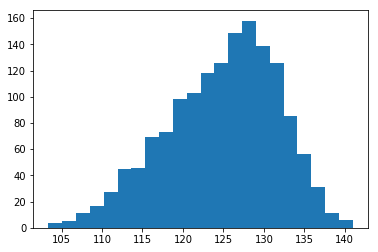

In [54]:
# Plot the target/dependent variable
plt.hist(y, bins='auto')

In [55]:
# check each independent variable ranges, mean, etc.
df.describe()

,Frequency,Angle,Chord length,velocity,thickness
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140
std,3152.573137,5.918128,0.093541,15.572784,0.013150
min,200.000000,0.000000,0.025400,31.700000,0.000401
25%,800.000000,2.000000,0.050800,39.600000,0.002535
50%,1600.000000,5.400000,0.101600,39.600000,0.004957
75%,4000.000000,9.900000,0.228600,71.300000,0.015576
max,20000.000000,22.200000,0.304800,71.300000,0.058411


### Q3.1. Fit a regression model towards the target variable "Sound Pressure" and compare R2 Score and MSE Scores on test data.

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
# fit the regression model
reg = LinearRegression().fit(X_train, y_train)

In [59]:
# reg.score returns R2 score
??reg.score

In [60]:
# output from model score `reg.score` and `r2_score` are same
from sklearn.metrics import r2_score

### Beware the positional argument when passing the parameters to the function

In [61]:
# R2 score from the model itself on test dataset
before_transform_original = reg.score(X_test,y_test)

In [62]:
# R2 score using the inbuilt function from sklearn library on test dataset
r2_score(y_test, reg.predict(X_test))

0.5124474986138429

In [21]:
# Mean Square error on test dataset
from sklearn.metrics import mean_squared_error

In [23]:
mean_squared_error(y_test, reg.predict(X_test))

22.954669535134123

In [24]:
# Comparision
# You can't compare the R2 and MSE specifically
# However, R2 score ranges from [-1,1] and MSE>=0
print("R2 Score on test dataset", r2_score(y_test, reg.predict(X_test)))
print("MSE Score on test dataset", mean_squared_error(y_test, reg.predict(X_test)))

('R2 Score on test dataset', 0.5124474986138429)
('MSE Score on test dataset', 22.954669535134123)


### Q3.2. Choose appropriate transformation (for example: Normalization, Scaling etc) to transform your data. Does transformation help in improving model's test accuracy?

In [63]:
df.describe()

,Frequency,Angle,Chord length,velocity,thickness
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140
std,3152.573137,5.918128,0.093541,15.572784,0.013150
min,200.000000,0.000000,0.025400,31.700000,0.000401
25%,800.000000,2.000000,0.050800,39.600000,0.002535
50%,1600.000000,5.400000,0.101600,39.600000,0.004957
75%,4000.000000,9.900000,0.228600,71.300000,0.015576
max,20000.000000,22.200000,0.304800,71.300000,0.058411


### MinMaxScaling

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [65]:
df = pd.read_csv(csv_file_name)

In [66]:
df.head()

,Frequency,Angle,Chord length,velocity,thickness,Sound Pressure
0,800.0,0.0,0.3048,71.3,0.002663,126.201
1,1000.0,0.0,0.3048,71.3,0.002663,125.201
2,1250.0,0.0,0.3048,71.3,0.002663,125.951
3,1600.0,0.0,0.3048,71.3,0.002663,127.591
4,2000.0,0.0,0.3048,71.3,0.002663,127.461


In [67]:
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

In [68]:
df.head()

,Frequency,Angle,Chord length,velocity,thickness,Sound Pressure
0,0.030303,0.0,1.0,1.0,0.039005,0.606829
1,0.040404,0.0,1.0,1.0,0.039005,0.580238
2,0.053030,0.0,1.0,1.0,0.039005,0.600181
3,0.070707,0.0,1.0,1.0,0.039005,0.643790
4,0.090909,0.0,1.0,1.0,0.039005,0.640333


In [69]:
y = df["Sound Pressure"].values
# drop column "Sound Pressure"
del df["Sound Pressure"]
X = df.values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
reg = LinearRegression().fit(X_train, y_train)

In [72]:
# R2 score from the model itself on test dataset
reg.score(X_test,y_test)

0.5124474986138445

In [76]:
def does_score_improved(old_score, new_score):
    return "Yes" if new_score > old_score else "No"

In [79]:
print("Score Improved from MinMax Transformation : \"{}\"".format(does_score_improved(old_score=before_transform_original,
                                                                       new_score=reg.score(X_test,y_test))))

Score Improved from MinMax Transformation : "Yes"


In [80]:
after_min_max_transformation_score = reg.score(X_test,y_test)

### StandardScaling

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
df = pd.read_csv(csv_file_name)

In [91]:
df.head()

,Frequency,Angle,Chord length,velocity,thickness,Sound Pressure
0,800.0,0.0,0.3048,71.3,0.002663,126.201
1,1000.0,0.0,0.3048,71.3,0.002663,125.201
2,1250.0,0.0,0.3048,71.3,0.002663,125.951
3,1600.0,0.0,0.3048,71.3,0.002663,127.591
4,2000.0,0.0,0.3048,71.3,0.002663,127.461


In [92]:
scaler = StandardScaler()

In [93]:
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

In [94]:
df.head()

,Frequency,Angle,Chord length,velocity,thickness,Sound Pressure
0,-0.662023,-1.146403,1.799299,1.312935,-0.644805,0.197939
1,-0.598561,-1.146403,1.799299,1.312935,-0.644805,0.052935
2,-0.519235,-1.146403,1.799299,1.312935,-0.644805,0.161688
3,-0.408177,-1.146403,1.799299,1.312935,-0.644805,0.399494
4,-0.281255,-1.146403,1.799299,1.312935,-0.644805,0.380644


In [95]:
y = df["Sound Pressure"].values
# drop column "Sound Pressure"
del df["Sound Pressure"]
X = df.values

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
reg = LinearRegression().fit(X_train, y_train)

In [98]:
# R2 score from the model itself on test dataset
reg.score(X_test,y_test)

0.5124474986138439

In [100]:
print("Score Improved from Std.Transformation : \"{}\"".format(does_score_improved(old_score=after_min_max_transformation_score,
                                                                       new_score=reg.score(X_test,y_test))))

Score Improved from Std.Transformation : "No"


In [101]:
# Not all transformation gives the better result
# We have to understand the descriptive statistics of the data before fitting the model

### Q3.3. Does this dataset contain multicollinearity. If yes, which column is causing the issue? 

How can you detect multicollinearity? 

1. **Bunch Map Analysis**: 
By plotting scatter plots between various columns, we can have a visual description of how the variables are related.


2. **Correlation Method**: 
By calculating the correlation coefficients between the variables we can get to know about the extent of multicollinearity in the data.


3. **VIF (Variance Inflation Factor) Method**: 
Firstly we fit a model with all the variables and then calculate the variance inflation factor (VIF) for each variable. VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. The higher the value of VIF for ith regressor, the more it is highly correlated to other variables.

In [102]:
# Since in the class, we have studied the basics of multicollinearity
# and we understand the correlation matrix method to detect the dependecy

In [103]:
df.corr()

,Frequency,Angle,Chord length,velocity,thickness
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107
Angle,-0.272765,1.000000,-0.504868,0.058760,0.753394
Chord length,-0.003661,-0.504868,1.000000,0.003787,-0.220842
velocity,0.133664,0.058760,0.003787,1.000000,-0.003974
thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000


In [106]:
#!pip install seaborn

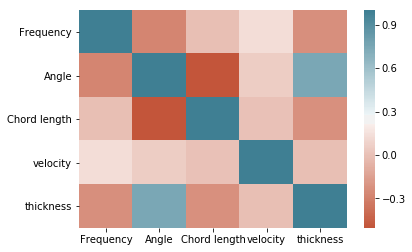

In [108]:
# Plot with some beautification
import seaborn as sns
sns.heatmap(df.corr(),cmap=sns.diverging_palette(20, 220, n=200))

#### From the graph, we can observe the followings
1. Angle and thickness have positive correlation having score 0.753394
2. Angle and chord have negative correlation having score -0.504868